In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import warnings
import sys
import time
warnings.filterwarnings('ignore')

from tqdm import tqdm
from pathlib import Path
from collections import Counter, defaultdict
from PIL import Image

In [2]:
try:
    import google.colab
    from google.colab import drive
    !uv pip install anomalib
    !uv pip install open-clip-torch
    drive.mount('/content/drive', force_remount=True)
    PROJECT_ROOT = Path('/content/drive/Othercomputers/Mac/multiModal_anomaly_report') # 본인 경로 수정: Mac/Window
except ImportError:
    PROJECT_ROOT = Path.cwd().parents[1]

os.chdir(PROJECT_ROOT) # 현재 경로 수정
print(f"Current working directory: {os.getcwd()}")

Mounted at /content/drive
Current working directory: /content/drive/Othercomputers/Mac/multiModal_anomaly_report


In [3]:
# TODO: PATH 설정

# dataset path
DATA_ROOT = PROJECT_ROOT / "dataset" / "MMAD"
DOMAIN_JSON = DATA_ROOT / "domain_knowledge.json"
MMAD_JSON = DATA_ROOT / "mmad.json"
META_CSV = DATA_ROOT / "metadata.csv"

# config.yaml path
CONFIG_ROOT = PROJECT_ROOT / "configs"
RUNTIME_CONFIG_ROOT = CONFIG_ROOT / "runtime.yaml"
EVAL_CONFIG_ROOT = CONFIG_ROOT / "eval.yaml"

# output path
OUTPUT_ROOT = PROJECT_ROOT / "output"

# check (선택사항)
# print(f"Project Root: {PROJECT_ROOT}")
# print(f"Data Root: {DATA_ROOT}")
# print(f"Config Root: {CONFIG_ROOT}")

### MVTecAD Dataset

In [5]:
from src.utils import load_config, load_json, load_csv
from anomalib.data import MVTecAD
from anomalib.models import WinClip
from anomalib.engine import Engine

# TODO: runtime_config.yaml 확장/수정
runtime_config = load_config(RUNTIME_CONFIG_ROOT)
domain_json = load_json(DOMAIN_JSON)
mmad_json = load_json(MMAD_JSON)
meta_csv = load_csv(META_CSV)

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"
categories = [
    "bottle", "cable", "capsule", "carpet", "grid",
    "hazelnut", "leather", "metal_nut", "pill", "screw",
    "tile", "toothbrush", "transistor", "wood", "zipper"
]

In [6]:
# Testing the model
for i, category in enumerate(categories, 1):
    print(f"\n[{i}/{len(categories)}] Testing: {category}...")

    start = time.time()

    datamodule = MVTecAD(
        root=DATA_ROOT / "MVTec-AD",
        category=category
    )

    model = WinClip()
    engine = Engine(
        logger=False,
        enable_progress_bar=False,
        accelerator="auto", # cpu, mps
        devices=1,
        default_root_dir=OUTPUT_ROOT
    )

    engine.test(datamodule=datamodule, model=model);

    elapsed = time.time() - start
    print(f"✓ [{i}/{len(categories)}] {category} 완료 ({elapsed:.1f}s)")


[1/15] Testing: bottle...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9865078926086426     │
│       image_F1Score       │    0.9677419066429138     │
│        pixel_AUROC        │    0.8568322658538818     │
│       pixel_F1Score       │    0.4932612180709839     │
└───────────────────────────┴───────────────────────────┘

✓ [1/15] bottle 완료 (122.8s)

[2/15] Testing: cable...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.8491379022598267     │
│       image_F1Score       │    0.8376963138580322     │
│        pixel_AUROC        │    0.6125057935714722     │
│       pixel_F1Score       │    0.12075560539960861    │
└───────────────────────────┴───────────────────────────┘

✓ [2/15] cable 완료 (175.2s)

[3/15] Testing: capsule...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.6627442836761475     │
│       image_F1Score       │    0.9304347634315491     │
│        pixel_AUROC        │    0.8692704439163208     │
│       pixel_F1Score       │    0.1416947990655899     │
└───────────────────────────┴───────────────────────────┘

✓ [3/15] capsule 완료 (164.9s)

[4/15] Testing: carpet...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │     0.993178129196167     │
│       image_F1Score       │    0.9720670580863953     │
│        pixel_AUROC        │    0.9087625741958618     │
│       pixel_F1Score       │    0.33916306495666504    │
└───────────────────────────┴───────────────────────────┘

✓ [4/15] carpet 완료 (150.9s)

[5/15] Testing: grid...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9916458129882812     │
│       image_F1Score       │    0.9734513163566589     │
│        pixel_AUROC        │    0.7940363883972168     │
│       pixel_F1Score       │    0.1413576900959015     │
└───────────────────────────┴───────────────────────────┘

✓ [5/15] grid 완료 (126.1s)

[6/15] Testing: hazelnut...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9253571033477783     │
│       image_F1Score       │     0.881118893623352     │
│        pixel_AUROC        │    0.9571954607963562     │
│       pixel_F1Score       │    0.38737058639526367    │
└───────────────────────────┴───────────────────────────┘

✓ [6/15] hazelnut 완료 (150.1s)

[7/15] Testing: leather...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │     0.994535505771637     │
│        pixel_AUROC        │    0.9539324641227722     │
│       pixel_F1Score       │    0.30699291825294495    │
└───────────────────────────┴───────────────────────────┘

✓ [7/15] leather 완료 (154.4s)

[8/15] Testing: metal_nut...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │     0.963831901550293     │
│       image_F1Score       │    0.9473684430122375     │
│        pixel_AUROC        │    0.4859693646430969     │
│       pixel_F1Score       │    0.2361394762992859     │
└───────────────────────────┴───────────────────────────┘

✓ [8/15] metal_nut 완료 (149.1s)

[9/15] Testing: pill...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │     0.509001612663269     │
│       image_F1Score       │    0.9120520949363708     │
│        pixel_AUROC        │    0.7286578416824341     │
│       pixel_F1Score       │    0.11877109110355377    │
└───────────────────────────┴───────────────────────────┘

✓ [9/15] pill 완료 (183.9s)

[10/15] Testing: screw...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.7198196649551392     │
│       image_F1Score       │    0.8571428656578064     │
│        pixel_AUROC        │    0.9088529348373413     │
│       pixel_F1Score       │    0.11315612494945526    │
└───────────────────────────┴───────────────────────────┘

✓ [10/15] screw 완료 (157.6s)

[11/15] Testing: tile...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9992785453796387     │
│       image_F1Score       │     0.988095223903656     │
│        pixel_AUROC        │    0.7908426523208618     │
│       pixel_F1Score       │    0.30923688411712646    │
└───────────────────────────┴───────────────────────────┘

✓ [11/15] tile 완료 (151.4s)

[12/15] Testing: toothbrush...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.8527777194976807     │
│       image_F1Score       │    0.8709677457809448     │
│        pixel_AUROC        │    0.8635084629058838     │
│       pixel_F1Score       │    0.10533826798200607    │
└───────────────────────────┴───────────────────────────┘

✓ [12/15] toothbrush 완료 (100.3s)

[13/15] Testing: transistor...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.8883333206176758     │
│       image_F1Score       │    0.7777777910232544     │
│        pixel_AUROC        │    0.8377417325973511     │
│       pixel_F1Score       │    0.2710164189338684     │
└───────────────────────────┴───────────────────────────┘

✓ [13/15] transistor 완료 (145.8s)

[14/15] Testing: wood...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9763157367706299     │
│       image_F1Score       │    0.9440000057220459     │
│        pixel_AUROC        │    0.8510288000106812     │
│       pixel_F1Score       │    0.35402166843414307    │
└───────────────────────────┴───────────────────────────┘

✓ [14/15] wood 완료 (123.0s)

[15/15] Testing: zipper...


INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9099264740943909     │
│       image_F1Score       │    0.9256198406219482     │
│        pixel_AUROC        │    0.9128455519676208     │
│       pixel_F1Score       │    0.2703879475593567     │
└───────────────────────────┴───────────────────────────┘

✓ [15/15] zipper 완료 (210.1s)


In [8]:
import logging
logging.disable(logging.WARNING)

# # tqdm bar on
# os.environ.pop("TQDM_DISABLE", None)

categories = [
    "bottle", "cable", "capsule", "carpet", "grid",
    "hazelnut", "leather", "metal_nut", "pill", "screw",
    "tile", "toothbrush", "transistor", "wood", "zipper"
]

all_predictions = {}
for i, category in enumerate(categories, 1):
    print(f"[{i}/{len(categories)}] Inference: {category}")
    # ckpt_path = OUTPUT_ROOT / category / "v0/weights/lightning/model.ckpt"
    # ckpt_path = OUTPUT_ROOT / "WinClip" / "MVTecAD" / category / "v0/weights/lightning/model.ckpt"

    datamodule = MVTecAD(
          root=DATA_ROOT / "MVTec-AD",
          category=category
    )

    model = WinClip()
    engine = Engine(
        logger=False,
        enable_progress_bar=False,
        accelerator="auto",
        devices=1,
        default_root_dir=OUTPUT_ROOT
    )

    predictions = engine.predict(
        datamodule=datamodule,
        model=model,
        # ckpt_path=ckpt_path,
    )

    all_predictions[category] = predictions
    print(f"✓ [{i}/{len(categories)}] {category} 완료\n")

[1/15] Inference: bottle
✓ [1/15] bottle 완료

[2/15] Inference: cable
✓ [2/15] cable 완료

[3/15] Inference: capsule
✓ [3/15] capsule 완료

[4/15] Inference: carpet
✓ [4/15] carpet 완료

[5/15] Inference: grid
✓ [5/15] grid 완료

[6/15] Inference: hazelnut
✓ [6/15] hazelnut 완료

[7/15] Inference: leather
✓ [7/15] leather 완료

[8/15] Inference: metal_nut
✓ [8/15] metal_nut 완료

[9/15] Inference: pill
✓ [9/15] pill 완료

[10/15] Inference: screw
✓ [10/15] screw 완료

[11/15] Inference: tile
✓ [11/15] tile 완료

[12/15] Inference: toothbrush
✓ [12/15] toothbrush 완료

[13/15] Inference: transistor
✓ [13/15] transistor 완료

[14/15] Inference: wood
✓ [14/15] wood 완료

[15/15] Inference: zipper
✓ [15/15] zipper 완료



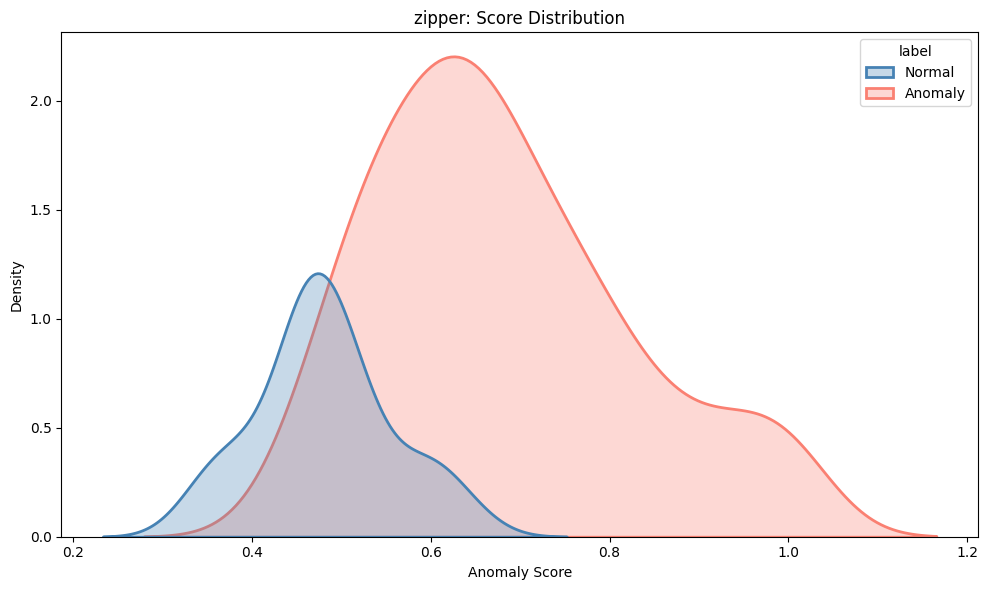

<Axes: title={'center': 'zipper: Score Distribution'}, xlabel='Anomaly Score', ylabel='Density'>

In [9]:
from src.visual.plot import kde_plot

y_true_list = []
y_score_list = []

for p in predictions:
    gt = p.gt_label.cpu().numpy() if hasattr(p.gt_label, 'cpu') else p.gt_label
    score = p.pred_score.cpu().numpy() if hasattr(p.pred_score, 'cpu') else p.pred_score
    y_true_list.append(gt)
    y_score_list.append(score)

y_true = np.concatenate(y_true_list)
y_score = np.concatenate(y_score_list)

normal_scores = y_score[y_true == 0]
anomaly_scores = y_score[y_true == 1]

scores_df = pd.DataFrame({
    'score': np.concatenate([normal_scores, anomaly_scores]),
    'label': ['Normal'] * len(normal_scores) + ['Anomaly'] * len(anomaly_scores)
})

kde_plot(
    scores_df,
    col='score',
    hue='label',
    palette=['steelblue', 'salmon'],
    title=f'{category}: Score Distribution',
    xlabel='Anomaly Score'
)

In [10]:
import torch
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    jaccard_score  # IoU
)

results = []
for category, preds in all_predictions.items():
    # Image-level
    y_true = np.concatenate([p.gt_label.cpu().numpy() for p in preds])
    y_score = np.concatenate([p.pred_score.cpu().numpy() for p in preds])
    y_pred = (y_score >= 0.5).astype(int)

    # Pixel-level
    gt_masks = torch.cat([p.gt_mask for p in preds]).int()
    pred_masks = torch.cat([(p.anomaly_map > 0.5).int() for p in preds])

    metrics = {
        "Category": category,
        "AUROC": round(roc_auc_score(y_true, y_score), 4),
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "Precision": round(precision_score(y_true, y_pred, zero_division=0), 4),
        "Recall": round(recall_score(y_true, y_pred, zero_division=0), 4),
        "F1": round(f1_score(y_true, y_pred, zero_division=0), 4),
        "Dice": round(
            f1_score(
                gt_masks.flatten().cpu().numpy(),
                pred_masks.flatten().cpu().numpy(),
                zero_division=0
            ),
            4
        ),
        "IoU": round(
            jaccard_score(
                gt_masks.flatten().numpy(),
                pred_masks.flatten().numpy(),
                average='binary',
                zero_division=0
            ),
            4
        ),
        "N_samples": len(y_true)
    }
    results.append(metrics)

metrics_df = pd.DataFrame(results).set_index("Category")
avg_row = metrics_df.drop(columns=['N_samples']).mean().round(4)
avg_row['N_samples'] = metrics_df['N_samples'].sum()
metrics_df.loc['Average'] = avg_row

metrics_df

,AUROC,Accuracy,Precision,Recall,F1,Dice,IoU,N_samples
Category,,,,,,,,
bottle,0.9865,0.9639,0.9839,0.9683,0.9760,0.4933,0.3274,83.0
cable,0.8491,0.8000,0.8100,0.8804,0.8438,0.1208,0.0643,150.0
capsule,0.6627,0.8864,0.8852,0.9908,0.9351,0.1417,0.0762,132.0
carpet,0.9932,0.9658,0.9670,0.9888,0.9778,0.3392,0.2042,117.0
grid,0.9916,0.9744,0.9825,0.9825,0.9825,0.1414,0.0761,78.0
hazelnut,0.9254,0.8545,0.8649,0.9143,0.8889,0.3874,0.2402,110.0
leather,1.0000,1.0000,1.0000,1.0000,1.0000,0.3070,0.1813,124.0
metal_nut,0.9638,0.9217,0.9286,0.9785,0.9529,0.2361,0.1339,115.0
pill,0.5090,0.8443,0.8443,1.0000,0.9156,0.1188,0.0631,167.0


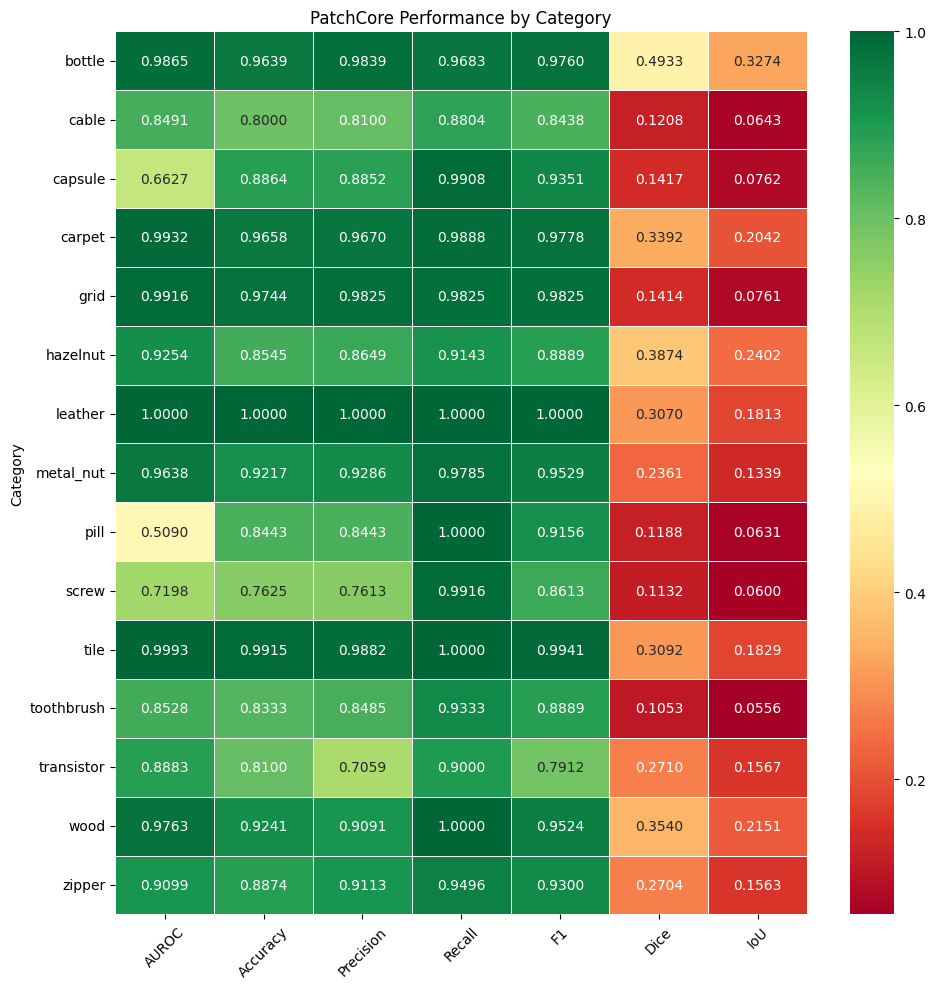

<Axes: title={'center': 'PatchCore Performance by Category'}, ylabel='Category'>

In [11]:
from src.visual.plot import heatmap_plot

metrics_trans = metrics_df.drop('Average').drop(columns='N_samples')
heatmap_plot(
    metrics_trans,
    figsize=(10, 10),
    cmap='RdYlGn',
    annot=True,
    fmt='.4f',
    linewidths=0.5,
    title='PatchCore Performance by Category',
    rotation_x=45,
    rotation_y=0
)

bottle


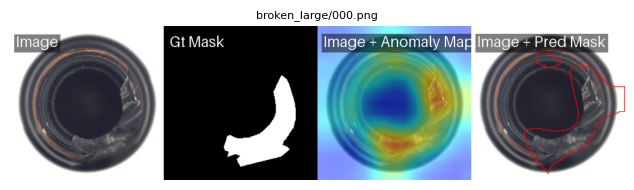

cable


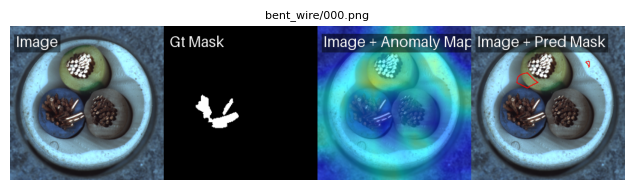

capsule


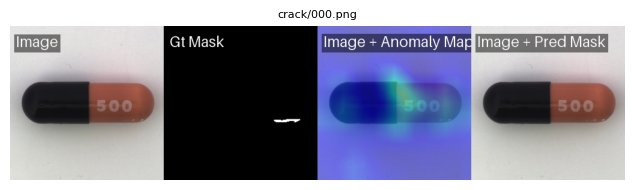

carpet


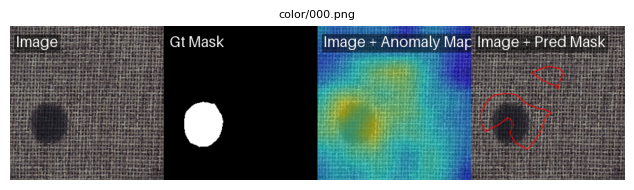

grid


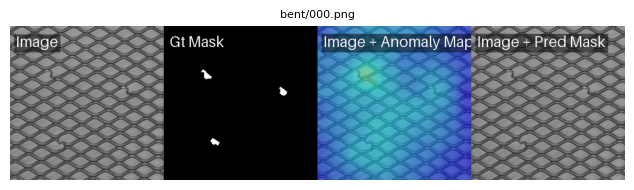

hazelnut


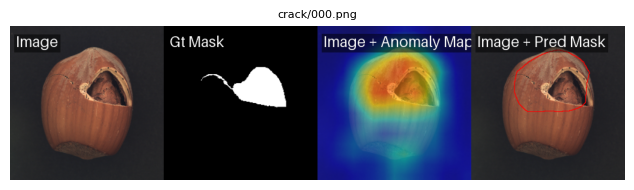

leather


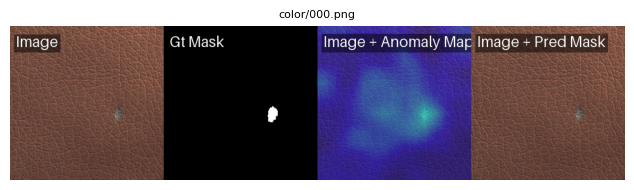

metal_nut


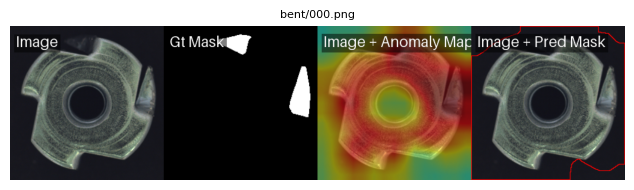

pill


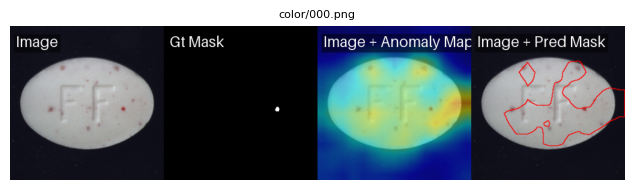

screw


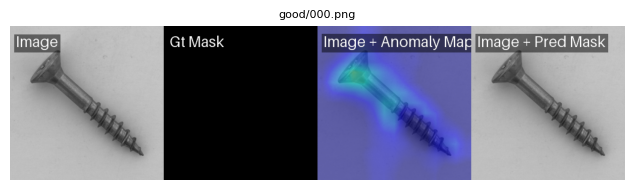

tile


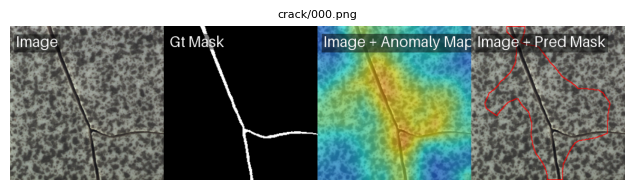

toothbrush


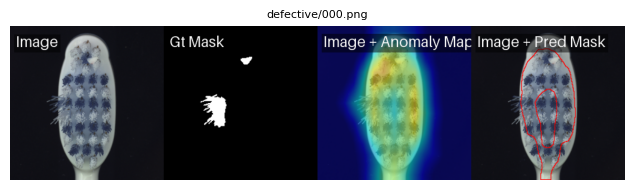

transistor


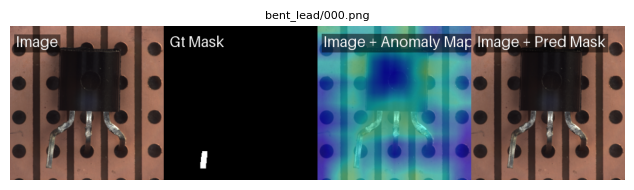

wood


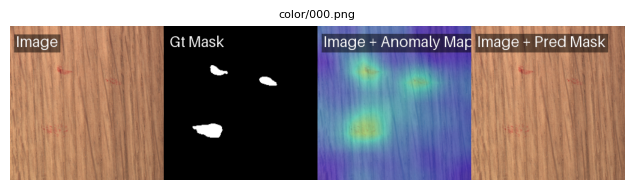

zipper


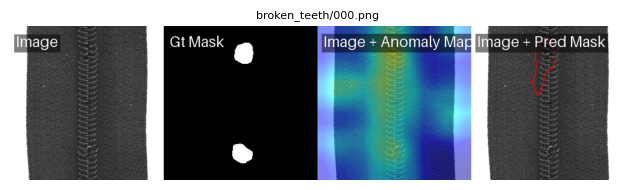

In [13]:
from src.visual.plot import anomaly_grid_from_dir

for category in categories:
    OUTPUT_IMG_ROOT = OUTPUT_ROOT / "WinClip" / "MVTecAD" / category / "latest" / "images"
    print(f"{category}")
    anomaly_grid_from_dir(OUTPUT_IMG_ROOT, n_samples=1, n_cols=1)